In [150]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.cross_validation import train_test_split, KFold, cross_val_score 

In [110]:
data = pd.read_csv("../datasets/dota win probability/features.csv")

In [161]:
X = data.drop(["radiant_win", "barracks_status_radiant", "barracks_status_dire", "tower_status_dire", "tower_status_radiant"], 1)
y = data.radiant_win

In [162]:
X.sample(5)

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration
6267,7393,1433298099,1,11,4,1403,914,10,0,3,...,-18.0,94.0,-82.0,199.0,2,5,4,0,-24.0,930
9419,11124,1434914821,0,44,5,1756,1393,22,0,0,...,8.0,NaN,-86.0,244.0,2,3,3,1,-16.0,2959
90866,106911,1449779261,1,46,5,2048,1666,28,0,0,...,9.0,249.0,-88.0,183.0,0,1,2,0,37.0,1363
93239,109693,1449891652,1,9,4,1423,1511,22,0,1,...,-5.0,158.0,-69.0,NaN,0,2,2,1,7.0,2459
18461,21738,1438478732,0,7,3,768,677,0,0,0,...,-29.0,90.0,-76.0,182.0,1,5,2,0,-38.0,1819


In [163]:
data.describe()

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
count,97230.000000,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,...,97230.000000,97230.000000,97230.000000,95404.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000
mean,57185.416744,1.444232e+09,2.630999,51.517104,3.442672,1233.405801,1147.899702,11.231996,0.357009,0.362285,...,3.349553,2.448339,0.689119,-6.901922,2332.247886,0.518503,1309.227790,1286.310820,40.599095,41.337036
std,33007.123878,5.515393e+06,2.835761,32.564211,1.111741,566.588895,464.111662,9.041620,0.663889,0.626704,...,1.155609,0.813459,0.710122,40.701397,715.806850,0.499660,853.921365,851.009148,27.871645,27.064873
min,0.000000,1.430199e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-84.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28545.250000,1.440815e+09,1.000000,22.000000,3.000000,767.000000,746.000000,2.000000,0.000000,0.000000,...,3.000000,2.000000,0.000000,-31.000000,1818.000000,0.000000,36.000000,256.000000,3.000000,3.000000
50%,57160.500000,1.446338e+09,1.000000,50.000000,3.000000,1175.000000,1113.000000,11.000000,0.000000,0.000000,...,3.000000,2.000000,1.000000,-16.000000,2268.000000,1.000000,1824.000000,1798.000000,63.000000,60.000000
75%,85755.750000,1.448829e+09,7.000000,75.000000,4.000000,1704.000000,1479.000000,19.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,8.000000,2778.000000,1.000000,1974.000000,1974.000000,63.000000,63.000000
max,114406.000000,1.450313e+09,7.000000,112.000000,6.000000,3319.000000,4332.000000,47.000000,8.000000,5.000000,...,9.000000,9.000000,13.000000,300.000000,8452.000000,1.000000,2047.000000,2047.000000,63.000000,63.000000


In [164]:
np.sum(X.isna())

match_id                           0
start_time                         0
lobby_type                         0
r1_hero                            0
r1_level                           0
r1_xp                              0
r1_gold                            0
r1_lh                              0
r1_kills                           0
r1_deaths                          0
r1_items                           0
r2_hero                            0
r2_level                           0
r2_xp                              0
r2_gold                            0
r2_lh                              0
r2_kills                           0
r2_deaths                          0
r2_items                           0
r3_hero                            0
r3_level                           0
r3_xp                              0
r3_gold                            0
r3_lh                              0
r3_kills                           0
r3_deaths                          0
r3_items                           0
r

In [165]:
X = X.fillna(0)

In [166]:
X, X_test, y, y_test = train_test_split(X, y, stratify=y)

In [197]:
kfold = KFold(X.shape[0], n_folds=5)

sklearn.cross_validation.KFold(n=72922, n_folds=5, shuffle=False, random_state=None)

A Jupyter Widget

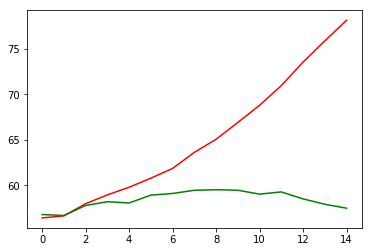

In [169]:
train = []
test = []

for i in tqdm(range(1, 16)):
    lr = DecisionTreeClassifier(min_samples_leaf=5, max_depth=i)
    lr.fit(X, y)
    train.append(accuracy_score(lr.predict(X), y) * 100)
    test.append(accuracy_score(lr.predict(X_test), y_test) * 100)

plot(train, c="red")
plot(test, c="green")

In [184]:
dt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=7)

In [185]:
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [186]:
accuracy_score(dt.predict(X), y) * 100 , accuracy_score(dt.predict(X_test), y_test) * 100

(61.845533583829294, 59.091657067632056)

In [ ]:
accuracy_score()

In [187]:
rf = RandomForestClassifier(n_jobs=8)

In [188]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=8,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [189]:
accuracy_score(rf.predict(X), y) * 100, accuracy_score(rf.predict(X_test), y_test) * 100

(98.77677518444365, 60.24765509297351)

In [202]:
gb = GradientBoostingClassifier()

In [203]:
gb.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [205]:
accuracy_score(gb.predict(X), y) * 100, accuracy_score(gb.predict(X_test), y_test) * 100

(66.32703436548641, 64.41089353299326)

In [201]:
np.mean(cross_val_score(rf, X, y, cv=5, n_jobs=8))

0.6023148815905249